In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

In [18]:

df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [19]:
# Display first few rows of the dataset
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [20]:
df.shape

(995, 3)

In [21]:
df.columns

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

In [22]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [23]:
df.isnull().sum()

,0
glucose,0
bloodpressure,0
diabetes,0


In [24]:
df.dropna(inplace=True) ## drop null values

In [25]:
df.isnull().sum()

,0
glucose,0
bloodpressure,0
diabetes,0


In [26]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


array([[<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bloodpressure'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

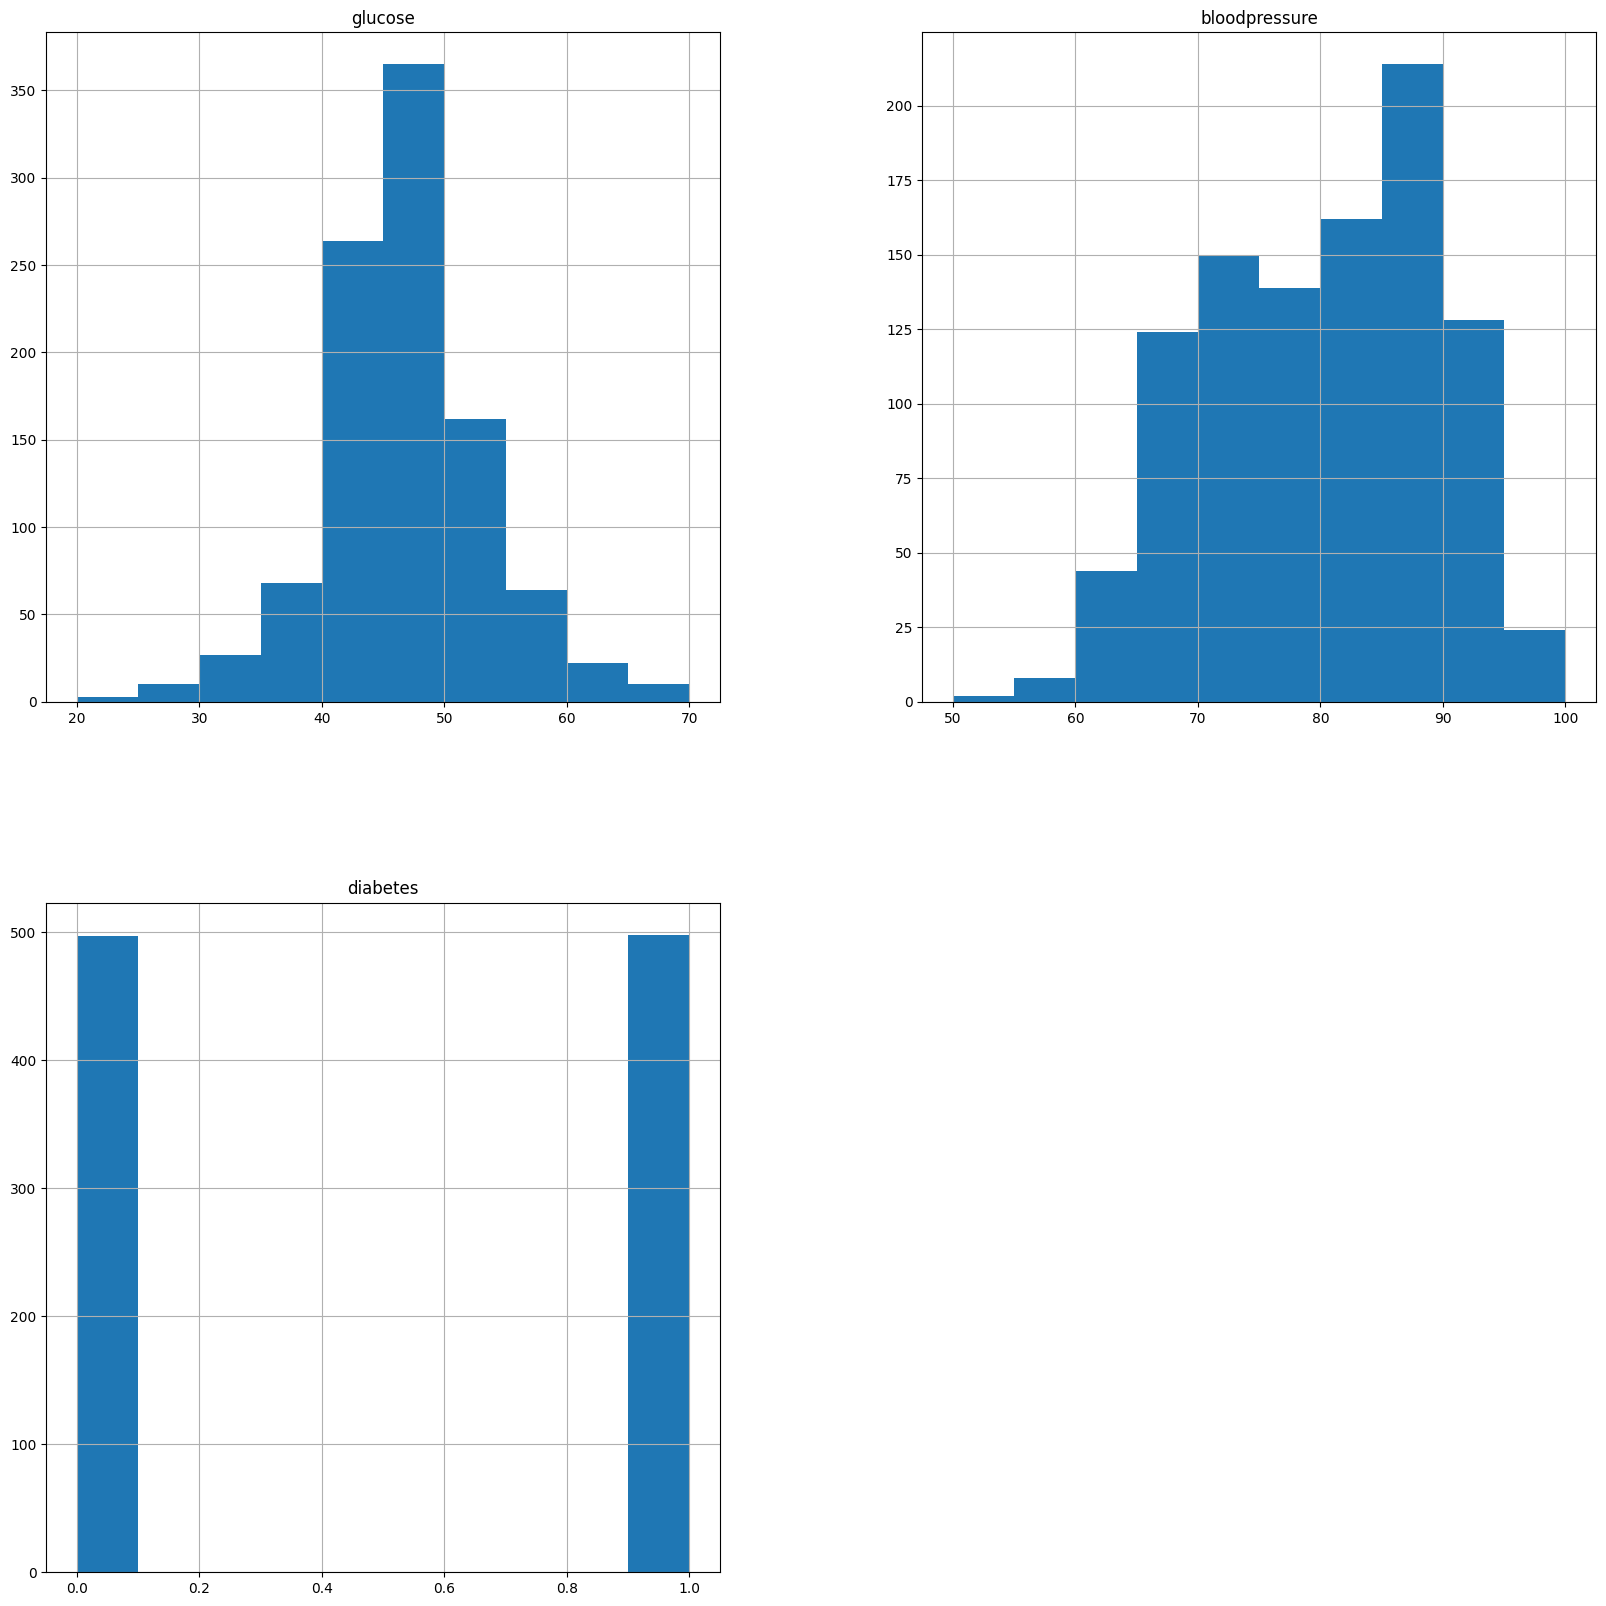

In [27]:
df.hist(figsize = (20,20))

<Axes: >

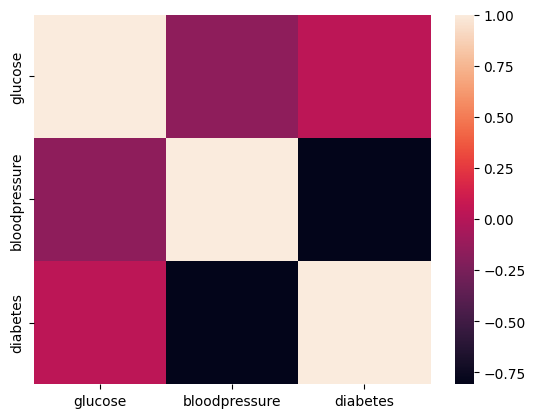

In [28]:
sns.heatmap(df.corr())

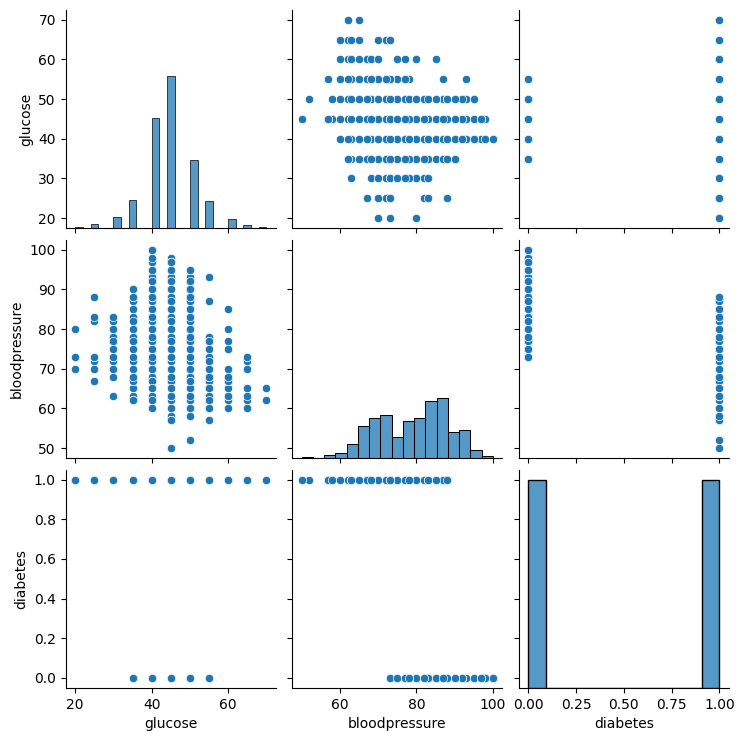

In [29]:
# Create the pairplot
sns.pairplot(df)

In [46]:
X = df.drop ('diabetes', axis=1)
y = df['diabetes']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X

,glucose,bloodpressure
0,40,85
1,40,92
2,45,63
3,45,80
4,40,73
...,...,...
990,45,87
991,40,83
992,40,83
993,40,60


In [49]:
y

,diabetes
0,0
1,0
2,1
3,0
4,1
...,...
990,0
991,0
992,0
993,1


In [50]:
X_train

,glucose,bloodpressure
753,40,82
327,45,82
824,45,85
929,45,67
543,40,82
...,...,...
106,45,75
270,55,67
860,35,78
435,40,93


In [51]:

y_train

,diabetes
753,1
327,1
824,0
929,1
543,1
...,...
106,1
270,1
860,1
435,0


In [52]:
# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

In [53]:
# Fit the model to the training data
model.fit(X_train, y_train)

GaussianNB()

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [55]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.31%
